In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
data=pd.read_csv("Tweets_1.csv")
data.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
data.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [ ]:
data.shape

(27481, 4)

In [ ]:
data=data.dropna()
data.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [ ]:
data.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
from html.parser import HTMLParser
html_parser=HTMLParser()

In [ ]:
data['clean_text']=data['text'].apply(lambda x:html_parser.unescape(x))
data.head(10)

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"I`d have responded, if I were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD I will miss you here in San Diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"Sons of ****, why couldn`t they put them on t..."
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http://www.dothebouncy.com/smf - some shameles...
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,2am feedings for the baby are fun when he is a...
7,50e14c0bb8,Soooo high,Soooo high,neutral,Soooo high
8,e050245fbd,Both of you,Both of you,neutral,Both of you
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,Journey!? Wow... u just became cooler. hehe....


In [ ]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)
    return input_txt    

In [ ]:
data['clean_text']=np.vectorize(remove_pattern)(data['clean_text'],"@[\w]*")
data.head(10)

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"I`d have responded, if I were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD I will miss you here in San Diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"Sons of ****, why couldn`t they put them on t..."
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http://www.dothebouncy.com/smf - some shameles...
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,2am feedings for the baby are fun when he is a...
7,50e14c0bb8,Soooo high,Soooo high,neutral,Soooo high
8,e050245fbd,Both of you,Both of you,neutral,Both of you
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,Journey!? Wow... u just became cooler. hehe....


In [ ]:
data['clean_text']=data['clean_text'].apply(lambda x:x.lower())
data.head(10)

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"i`d have responded, if i were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"sons of ****, why couldn`t they put them on t..."
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http://www.dothebouncy.com/smf - some shameles...
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,2am feedings for the baby are fun when he is a...
7,50e14c0bb8,Soooo high,Soooo high,neutral,soooo high
8,e050245fbd,Both of you,Both of you,neutral,both of you
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,journey!? wow... u just became cooler. hehe....


In [ ]:
apostrophe_dict={
    "ain't":"am not/are not",
    "are'nt":"are not",
    "can't":"cannot",
    "can't've":"cannot have",
    "'cause'":"because",
    "i`d": "I had / I would",
    "could'nt":"could not",
    "i'm":"i am",
    "i`ve":"i have",
    "fillin'":"filling",
    "that's":"that is",
    "o'":"of",
    "it's":"it is",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "hes":"he is",
}
apostrophe_dict

{"ain't": 'am not/are not',
 "are'nt": 'are not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause'": 'because',
 'i`d': 'I had / I would',
 "could'nt": 'could not',
 "i'm": 'i am',
 'i`ve': 'i have',
 "fillin'": 'filling',
 "that's": 'that is',
 "o'": 'of',
 "it's": 'it is',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might not have',
 "must've": 'must have',
 "mustn't": 'must not',
 "mustn't've": 'must not have',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "she'd": 'she had / she would',
 "she'd've": 'she would have',
 "she'll": 'she shall / she will',
 "she'll've": 'she shall have / she will have'

In [ ]:
def lookup_dict(text,dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text=text.replace(word,dictionary[word.lower()])
    return text            

In [ ]:
data['clean_text']=data['clean_text'].apply(lambda x:lookup_dict(x,apostrophe_dict))
data.head(20)

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"I had / I would have responded, if i were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"sons of ****, why couldn`t they put them on t..."
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http://www.dothebouncy.com/smf - some shameles...
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,2am feedings for the baby are fun when he is a...
7,50e14c0bb8,Soooo high,Soooo high,neutral,soooo high
8,e050245fbd,Both of you,Both of you,neutral,both of you
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,journey!? wow... u just became cooler. hehe....


In [ ]:
short_dict={
    "u":"you",
    "sooo":"so",
    "2am":"two am",
    
}
short_dict

{'u': 'you', 'sooo': 'so', '2am': 'two am'}

In [ ]:
data['clean_text']=data['clean_text'].apply(lambda x:lookup_dict(x,short_dict))
data.head(10)

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"I had / I would have responded, if i were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad i will miss you here in san diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"sons of ****, why couldn`t they put them on t..."
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http://www.dothebouncy.com/smf - some shameles...
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,two am feedings for the baby are fun when he i...
7,50e14c0bb8,Soooo high,Soooo high,neutral,soooo high
8,e050245fbd,Both of you,Both of you,neutral,both of you
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,joyourney!? wow... you jyoust became cooler. ...


In [ ]:
emoji_dict={
    ":)":"happy",
    ":-)":"happy",
    ":-]":"happy",
    "xd":"happy",
    ":(":"sad",
    ":<":"sad",
    ":{":"sad",
    ">:(":"sad",
    "!":"surprised",
}
emoji_dict

{':)': 'happy',
 ':-)': 'happy',
 ':-]': 'happy',
 'xd': 'happy',
 ':(': 'sad',
 ':<': 'sad',
 ':{': 'sad',
 '>:(': 'sad',
 '!': 'surprised'}

In [ ]:
data['clean_text']=data['clean_text'].apply(lambda x:lookup_dict(x,emoji_dict))
data.head(10)

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"I had / I would have responded, if i were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad i will miss you here in san diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"sons of ****, why couldn`t they put them on t..."
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http://www.dothebouncy.com/smf - some shameles...
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,two am feedings for the baby are fun when he i...
7,50e14c0bb8,Soooo high,Soooo high,neutral,soooo high
8,e050245fbd,Both of you,Both of you,neutral,both of you
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,joyourney!? wow... you jyoust became cooler. ...


In [ ]:
data['clean_text']=data['clean_text'].apply(lambda x:re.sub(r'[^\w\s]',' ',x))
data.head(10)

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,I had I would have responded if i were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldn t they put them on t...
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http www dothebouncy com smf some shameles...
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,two am feedings for the baby are fun when he i...
7,50e14c0bb8,Soooo high,Soooo high,neutral,soooo high
8,e050245fbd,Both of you,Both of you,neutral,both of you
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,joyourney wow you jyoust became cooler ...


In [ ]:
data['clean_text']=data['clean_text'].apply(lambda x:re.sub(r'[^a-zA-Z0-9]',' ',x))
data.head(10)

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,I had I would have responded if i were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldn t they put them on t...
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http www dothebouncy com smf some shameles...
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,two am feedings for the baby are fun when he i...
7,50e14c0bb8,Soooo high,Soooo high,neutral,soooo high
8,e050245fbd,Both of you,Both of you,neutral,both of you
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,joyourney wow you jyoust became cooler ...


In [ ]:
data['clean_text']=data['clean_text'].apply(lambda x:' '.join([w for w in x.split() if len(w)>1]))
data['clean_text'][0:5]

0               had would have responded if were going
1               so sad will miss you here in san diego
2                               my boss is bullying me
3                        what interview leave me alone
4    sons of why couldn they put them on the releas...
Name: clean_text, dtype: object

In [ ]:
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def wordopt(text):
    clean_text=str(text).lower()
    clean_text=re.sub('\[.*?\]','',text)
    clean_text=re.sub('https?://\S+|www\.\S+', '',text)
    clean_text=re.sub('<.*?>+', '',text)
    clean_text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    clean_text=re.sub('\n', '',text)
    clean_text=re.sub('\w*\d\w*', '',text)
    clean_text=[word for word in text.split(' ') if word not in stopword]
    clean_text=" ".join(text)
    return clean_text


In [ ]:
data.head()

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,had would have responded if were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldn they put them on the releas...


In [ ]:
data.head(10)

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,had would have responded if were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldn they put them on the releas...
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http www dothebouncy com smf some shameless pl...
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,two am feedings for the baby are fun when he i...
7,50e14c0bb8,Soooo high,Soooo high,neutral,soooo high
8,e050245fbd,Both of you,Both of you,neutral,both of you
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,joyourney wow you jyoust became cooler hehe is...


In [ ]:
data.head(10)

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,had would have responded if were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldn they put them on the releas...
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http www dothebouncy com smf some shameless pl...
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,two am feedings for the baby are fun when he i...
7,50e14c0bb8,Soooo high,Soooo high,neutral,soooo high
8,e050245fbd,Both of you,Both of you,neutral,both of you
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,joyourney wow you jyoust became cooler hehe is...


In [ ]:
data.head()

In [ ]:
tokenized_tweet=data['clean_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0       [had, would, have, responded, if, were, going]
1     [so, sad, will, miss, you, here, in, san, diego]
2                         [my, boss, is, bullying, me]
3                  [what, interview, leave, me, alone]
4    [sons, of, why, couldn, they, put, them, on, t...
Name: clean_text, dtype: object

In [ ]:
data.head()

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,had would have responded if were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldn they put them on the releas...


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
data.head(20)

,textID,text,selected_text,sentiment,clean_text,Positive,Negative,Neutral
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,had would have responded if were going,0.000,0.000,1.000
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad will miss you here in san diego,0.000,0.474,0.526
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,0.000,0.494,0.506
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,0.000,0.538,0.462
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldn they put them on the releas...,0.000,0.000,1.000
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http www dothebouncy com smf some shameless pl...,0.269,0.154,0.577
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,two am feedings for the baby are fun when he i...,0.348,0.000,0.652
7,50e14c0bb8,Soooo high,Soooo high,neutral,soooo high,0.000,0.000,1.000
8,e050245fbd,Both of you,Both of you,neutral,both of you,0.000,0.000,1.000
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,joyourney wow you jyoust became cooler hehe is...,0.000,0.000,1.000


In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(text,clean_text)
plt.show()

NameError: name 'text' is not defined

<BarContainer object of 1 artists>

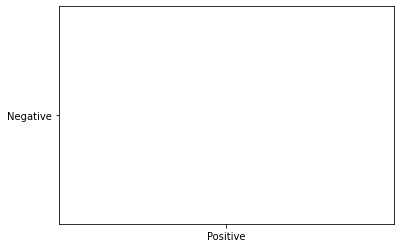

In [ ]:
plt.bar('Positive','Negative')

In [ ]:
plt.show()

In [ ]:
df=pd.DataFrame(data)
df['tokenized_tweet']=tokenized_tweet

In [ ]:
print(df)

           textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  \
0                    I`d have responded, if I were going   neutra

In [ ]:
data.head(40)

,textID,text,selected_text,sentiment,clean_text,Positive,Negative,Neutral,tokenized_tweet
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,had would have responded if were going,0.000,0.000,1.000,"[had, would, have, responded, if, were, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,so sad will miss you here in san diego,0.000,0.474,0.526,"[so, sad, will, miss, you, here, in, san, diego]"
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,0.000,0.494,0.506,"[my, boss, is, bullying, me]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,0.000,0.538,0.462,"[what, interview, leave, me, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldn they put them on the releas...,0.000,0.000,1.000,"[sons, of, why, couldn, they, put, them, on, t..."
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http www dothebouncy com smf some shameless pl...,0.269,0.154,0.577,"[http, www, dothebouncy, com, smf, some, shame..."
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,two am feedings for the baby are fun when he i...,0.348,0.000,0.652,"[two, am, feedings, for, the, baby, are, fun, ..."
7,50e14c0bb8,Soooo high,Soooo high,neutral,soooo high,0.000,0.000,1.000,"[soooo, high]"
8,e050245fbd,Both of you,Both of you,neutral,both of you,0.000,0.000,1.000,"[both, of, you]"
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,joyourney wow you jyoust became cooler hehe is...,0.000,0.000,1.000,"[joyourney, wow, you, jyoust, became, cooler, ..."
